# [ENTREGA] Tarea de clasificación


Alvaro Lucio-Villegas de Cea

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

fruits = pd.read_csv('../../datasets/frutas.csv')


In [22]:
print(fruits.describe())

             peso
count   10.000000
mean   136.000000
std     38.643671
min     80.000000
25%    105.000000
50%    130.000000
75%    160.000000
max    200.000000


In [23]:

# Imprimir la cantidad de valores nulos en la columna 'fruits'
print(fruits.isnull().sum())

# Eliminar los valores nulos de la columna 'fruits'
fruits = fruits.dropna()

# Crear una nueva columna llamada 'textura' y asignarle un valor de 1 si es suave, 0 si no lo es 
fruits['textura'] = fruits['textura'].apply(lambda x: 1 if x == 'suave' else 0)

# Crear variables dummy para la columna 'color' 
fruits = pd.get_dummies(fruits, columns=['color'])



peso       0
textura    0
color      0
fruta      0
dtype: int64


In [24]:
fruits

,peso,textura,fruta,color_amarillo,color_naranja,color_rojo,color_verde
0,120,1,banana,1,0,0,0
1,160,1,banana,1,0,0,0
2,100,0,manzana,0,0,1,0
3,180,0,manzana,0,0,1,0
4,80,1,manzana,0,0,0,1
5,140,0,manzana,0,0,0,1
6,200,0,naranja,1,0,0,0
7,160,1,naranja,0,1,0,0
8,120,0,manzana,0,0,1,0
9,100,1,manzana,0,0,0,1


In [25]:

# Eliminar la columna 'fruta' de la tabla 'fruits'
X = fruits.drop('fruta', axis=1)

# Guardar los valores de la columna 'fruta' en una variable nueva
y = fruits['fruta']



In [26]:

# Obtener los datos y etiquetas
x = fruits[['peso', 'textura', 'color_amarillo','color_rojo','color_naranja','color_verde']].values
y = fruits['fruta'].values


In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [28]:
model = DecisionTreeClassifier()


In [29]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [30]:

# Predecir los valores de X_test con el modelo
y_pred = model.predict(X_test)

# Calcular la precisión del modelo comparando los resultados de y_test y y_pred
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión del modelo
print('Precisión:', accuracy)




Precisión: 1.0


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

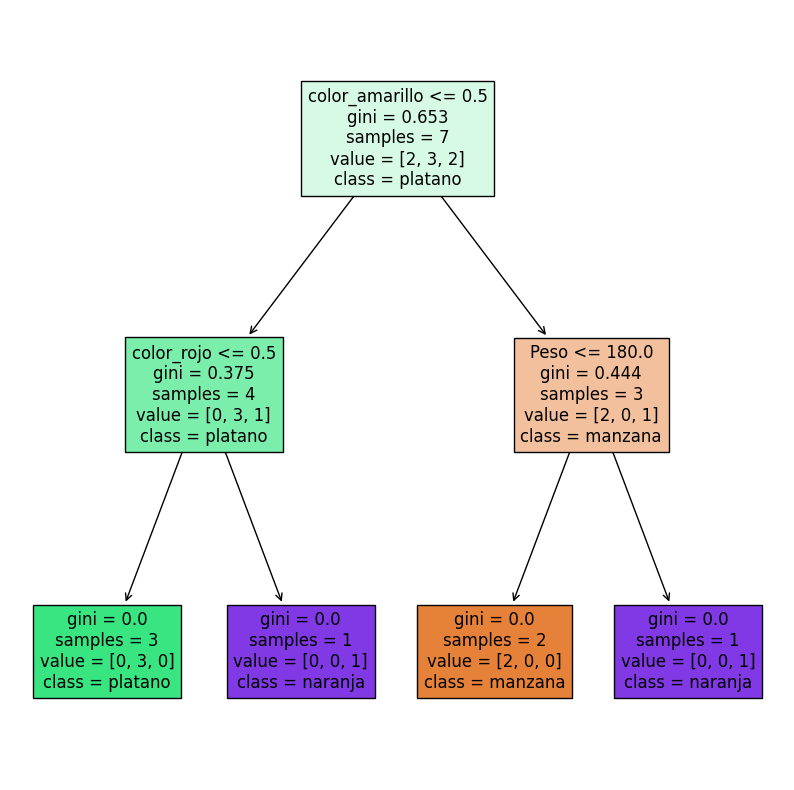

In [32]:
# Crear una figura con un tamaño de 10x10
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el árbol de decisión con los atributos y clases especificados 
plot_tree(model, filled=True, ax=ax, feature_names=["Peso", "Textura", 'color_amarillo','color_rojo','color_naranja','color_verde'], class_names=["manzana", "platano", "naranja"])

# Mostrar la figura creada 
plt.show(fig)

